# Support Vector Machines using Python

# Reading iris dataset

In [1]:
import sklearn.datasets as datasets
import pandas as pd

# Load the data
iris = datasets.load_iris()

# We define a Dataframe (tabular structure) with the predictor variables
# and on the other hand a separated vector with the response variable
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target # Target variable

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


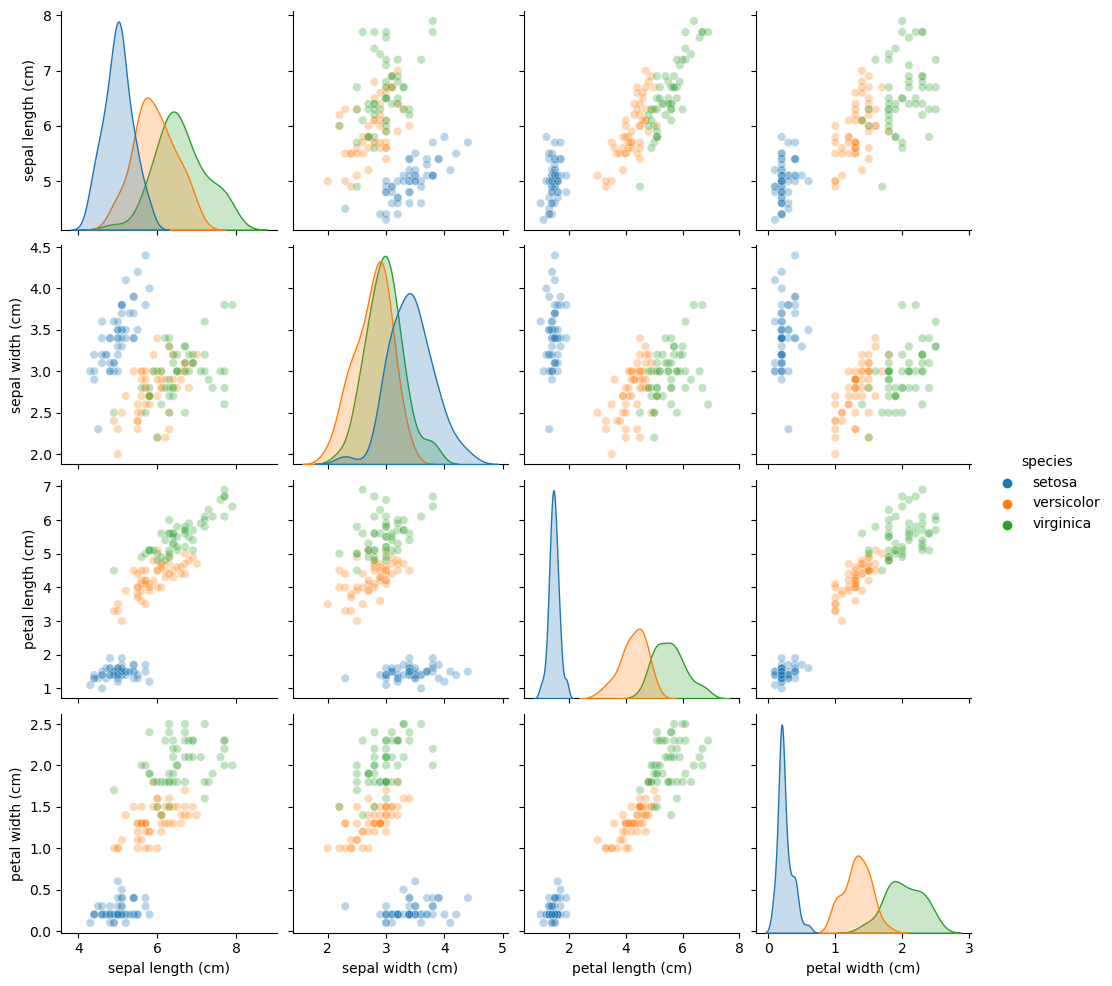

In [2]:
import seaborn as sns

df_label = iris_df.copy()
species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_label['species'] = pd.Series(y).map(species_dict)

sns.pairplot(df_label,
             hue='species',
             plot_kws=dict(alpha=0.3) # Transparency prevents under-representation of overlapping points
            )

# Train test split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_df, y, test_size=0.25, random_state=70)

# Python f-strings
print(f'Train dataset size {len(X_train)} / Test dataset size {len(X_test)}')

Train dataset size 112 / Test dataset size 38


In [4]:
a = 10
f'my number is {a}'

'my number is 10'

# SVM: a bit of theory

Check `LabSVM.pdf` file

https://github.com/icaromedeiros/master_eae/blob/main/old_material/LabSVM/material/en/LabSVM.pdf

Based on [Scikit's documentation](https://scikit-learn.org/stable/modules/svm.html#support-vector-machines):

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples (useful in **NLP**)
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

## SVM in Python

With the scikit-learn library, all the models follow the same approach:
1. instantiate model
1. fit (for training)
1. predict

If we now try with an SVM (Support Vector Classifier):

In [5]:
from sklearn import svm

# Classifier SVM w/ RBF kernel function
clf_svm_rbf = svm.SVC(kernel='rbf') # Radial Basis Function
clf_svm_rbf.fit(X_train, y_train)
clf_svm_rbf

SVC()

In [6]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [7]:
dir(clf_svm_rbf)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_class_weight',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_num_iter',
 '_parameter_constraints',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_

scikit-learn is powerful. In the same way that inside **metrics** we can use the function of the `confusion_matrix`, we can also use the accuracy directly!

In [8]:
from sklearn.metrics import confusion_matrix

svm_preds = clf_svm_rbf.predict(X_test)
svm_conf_mat = confusion_matrix(y_test, svm_preds)
svm_conf_mat

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 12]])

In [9]:
from sklearn.metrics import accuracy_score

print('Obtained accuracy with SVM is: {}.'
      .format(accuracy_score(y_test, svm_preds)))

Obtained accuracy with SVM is: 1.0.


# Visualize the Kernels

For convenience, we will reload the data and take only the first 2 features of the iris dataset:

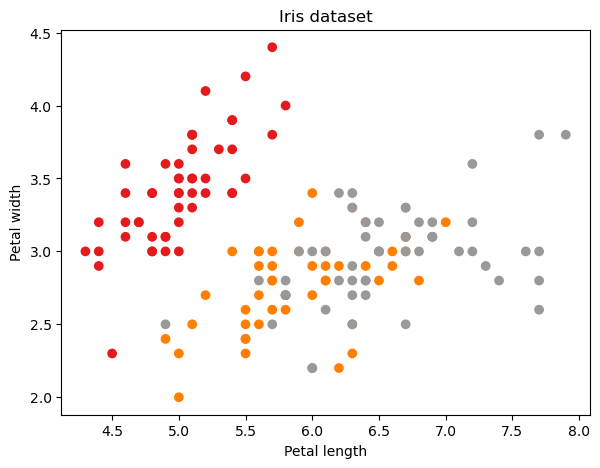

In [10]:
from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :2] # first 2 features
y = iris.target

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Iris dataset')
plt.show()

# Training

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

svc_clf = svm.SVC(kernel='linear', C=1, gamma=1) # C and gamma are hyper-parameters
svc_clf.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

# Hyper parameters

In [12]:
help(svc_clf)

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `

# Recommended exercise: Play out with different hyper-parameters

In [13]:
C = 1
gamma = 1

# Plotting decision regions

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

> **Remember** we're just using two dimensions in order to better visualize the classifier

In [19]:
X_test[:5]

array([[6.1, 2.8],
       [5.7, 3.8],
       [7.7, 2.6],
       [6. , 2.9],
       [6.8, 2.8]])

# Model training/fitting for different kernels and implementations

In [33]:
models = [
    svm.SVC(kernel="linear", C=1),
    svm.LinearSVC(C=1, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=1),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=1),
]

models = [clf.fit(X, y) for clf in models]
models

[SVC(C=1, kernel='linear'),
 LinearSVC(C=1, max_iter=10000),
 SVC(C=1, gamma=0.7),
 SVC(C=1, gamma='auto', kernel='poly')]

In [1]:
y

NameError: name 'y' is not defined

# Kernel comparison

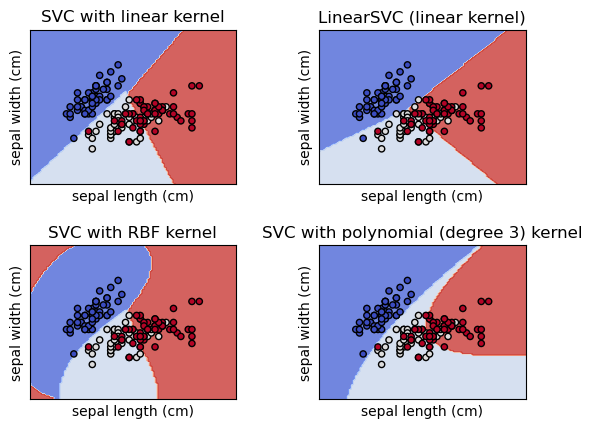

In [34]:
from sklearn.inspection import DecisionBoundaryDisplay

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

predicted = models[0].predict(X_test)

linear_conf_mat = confusion_matrix(y_test, predicted)
linear_conf_mat

array([[19,  0,  0],
       [ 0,  9,  6],
       [ 0,  4, 12]])

In [41]:
linear_acc = accuracy_score(y_test, predicted)
linear_acc

0.8

In [36]:
predicted_rbf = models[2].predict(X_test)

svm_conf_mat_rbf = confusion_matrix(y_test, predicted_rbf)
svm_conf_mat_rbf

array([[19,  0,  0],
       [ 0,  9,  6],
       [ 0,  3, 13]])

In [42]:
svm_conf_mat_acc = accuracy_score(y_test, predicted_rbf)
svm_conf_mat_acc

0.82